In [1]:
import numpy as np
import pandas as pd

In [2]:
#importing data
interactions = pd.read_csv('C:/Users/Razvan/Desktop/interactions_train.csv')
interactions.head()

,user_id,recipe_id,date,rating,u,i
0,2046,4684,2000-02-25,5.0,22095,44367
1,2046,517,2000-02-25,5.0,22095,87844
2,1773,7435,2000-03-13,5.0,24732,138181
3,1773,278,2000-03-13,4.0,24732,93054
4,2046,3431,2000-04-07,5.0,22095,101723


In [3]:
interactions.describe()

,user_id,recipe_id,rating,u,i
count,6.989010e+05,698901.000000,698901.000000,698901.000000,698901.000000
mean,1.247694e+07,156173.409849,4.574090,4249.330271,87519.330993
std,1.525031e+08,126594.880211,0.959022,5522.602821,51290.370370
min,1.533000e+03,38.000000,0.000000,0.000000,0.000000
25%,1.059880e+05,53169.000000,4.000000,455.000000,42988.000000
50%,2.301020e+05,116484.000000,5.000000,1737.000000,87424.000000
75%,4.801950e+05,234516.000000,5.000000,5919.000000,131731.000000
max,2.002313e+09,537458.000000,5.000000,25075.000000,178262.000000


We have 698,901 records

# task 1. remove ratings of 0

In [4]:
interactions_1 = interactions[interactions.rating != 0]
interactions_1.describe()

,user_id,recipe_id,rating,u,i
count,6.819440e+05,681944.000000,681944.000000,681944.000000,681944.000000
mean,1.168652e+07,156407.130607,4.687828,4194.870365,87535.427500
std,1.474000e+08,126624.116985,0.639851,5483.353018,51309.639461
min,1.533000e+03,38.000000,1.000000,0.000000,0.000000
25%,1.056010e+05,53405.000000,5.000000,453.000000,42983.750000
50%,2.296190e+05,116839.000000,5.000000,1703.000000,87424.000000
75%,4.743220e+05,234707.000000,5.000000,5804.000000,131785.000000
max,2.002313e+09,537458.000000,5.000000,25075.000000,178262.000000


We can see that the min for rating now is 1, and the count decreased to 681,944

# task2. let's remove U and I

In [5]:
interactions_2 = interactions_1[['user_id','recipe_id','rating', 'date' ]]
interactions_2

,user_id,recipe_id,rating,date
0,2046,4684,5.0,2000-02-25
1,2046,517,5.0,2000-02-25
2,1773,7435,5.0,2000-03-13
3,1773,278,4.0,2000-03-13
4,2046,3431,5.0,2000-04-07
...,...,...,...,...
698896,926904,457971,5.0,2018-12-18
698897,2002312797,27208,5.0,2018-12-18
698898,1290903,131607,5.0,2018-12-18
698899,226867,363072,5.0,2018-12-18


task3. mean of ratings

In [6]:
interactions_2['rating'].mean()

4.687827739521134

# task4 . Most ratings, with dates and counts

In [7]:
daily_data = interactions_2.groupby('date').count().sort_values('rating', ascending = False)
daily_data[['rating']]

,rating
date,
2008-01-27,495
2008-06-30,493
2008-07-01,473
2008-06-18,461
2008-01-06,458
...,...
2001-05-17,1
2001-05-16,1
2001-05-13,1


# task5. customer with most ratings (similar, just groupby user_id)

In [8]:
top_raters = interactions_2.groupby('user_id').count().sort_values('rating', ascending = False)
top_raters[['rating']].head(1)

,rating
user_id,
424680,6431


# task6. What user_ID(s) gave the best rating, and what was the recipe_ID(s) associated with that rating? (similar, mean instead of count)

In [9]:
average_ratings = interactions_2.groupby('user_id').mean().sort_values('rating', ascending = False)[['rating']]
average_ratings

,rating
user_id,
970593,5.0
633802,5.0
1018029,5.0
1016412,5.0
1015864,5.0
...,...
80101,1.0
1623675,1.0
778109,1.0


We can see that more than just one gave the maximum score on average. So we will filter to all those who gave the max

In [10]:
average_ratings[average_ratings.rating == 5]

,rating
user_id,
970593,5.0
633802,5.0
1018029,5.0
1016412,5.0
1015864,5.0
...,...
1588352,5.0
76475,5.0
436644,5.0


9080 users gave maximum scores to all their ratings.

# Task7. What month(s)/year(s) had the most ratings submitted and what was the number of ratings submitted?

In [11]:
interactions_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 681944 entries, 0 to 698900
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   user_id    681944 non-null  int64  
 1   recipe_id  681944 non-null  int64  
 2   rating     681944 non-null  float64
 3   date       681944 non-null  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 26.0+ MB


my date is an object, so I have to transform this to a datetime object

In [12]:
interactions_2 = interactions_2.set_index('date')
interactions_2

,user_id,recipe_id,rating
date,,,
2000-02-25,2046,4684,5.0
2000-02-25,2046,517,5.0
2000-03-13,1773,7435,5.0
2000-03-13,1773,278,4.0
2000-04-07,2046,3431,5.0
...,...,...,...
2018-12-18,926904,457971,5.0
2018-12-18,2002312797,27208,5.0
2018-12-18,1290903,131607,5.0


In [13]:
interactions_2.index = pd.to_datetime(interactions_2.index)
interactions_2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 681944 entries, 2000-02-25 to 2018-12-19
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   user_id    681944 non-null  int64  
 1   recipe_id  681944 non-null  int64  
 2   rating     681944 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 20.8 MB


Now we have a datetime index, that can be easily manipulated and grouped my month.

In [14]:
interactions_2.resample('M').count().sort_values('rating', ascending = False)

,user_id,recipe_id,rating
date,,,
2008-01-31,11607,11607,11607
2008-06-30,10787,10787,10787
2009-01-31,10723,10723,10723
2007-06-30,9359,9359,9359
2008-11-30,9221,9221,9221
...,...,...,...
2000-04-30,1,1,1
2000-11-30,1,1,1
2000-08-31,0,0,0


January 2008 had the most ratings

# task8. What month/year had the best avg rating? What month/year had the best avg rating and most ratings submitted? (the second part of the question is a the previous question, so I'll ignore it)

In [15]:
avg_per_month = interactions_2.resample('M').mean().sort_values('rating', ascending = False)
avg_per_month

,user_id,recipe_id,rating
date,,,
2000-02-29,2046.000000,2600.5,5.0
2000-11-30,2178.000000,4366.0,5.0
2000-04-30,2046.000000,3431.0,5.0
2000-05-31,2046.000000,13307.0,5.0
2000-09-30,2312.000000,26372.0,5.0
...,...,...,...
2001-03-31,5877.833333,7672.0,3.5
2001-01-31,2503.500000,2000.5,3.0
2000-06-30,NaN,NaN,NaN


Again, we see we have entire months where the avg rating was 5. That is a bit surprising, considering we have 600k records

So let's explore one of this month to see if this is accurate

In [16]:
month_2_of_2020 = interactions_2['2000-02']

In [17]:
month_2_of_2020

,user_id,recipe_id,rating
date,,,
2000-02-25,2046,4684,5.0
2000-02-25,2046,517,5.0


Yes, we have just two 5 stars ratings. Moving to the task 

In [18]:
avg_per_month[avg_per_month.rating == 5]

,user_id,recipe_id,rating
date,,,
2000-02-29,2046.0,2600.5,5.0
2000-11-30,2178.0,4366.0,5.0
2000-04-30,2046.0,3431.0,5.0
2000-05-31,2046.0,13307.0,5.0
2000-09-30,2312.0,26372.0,5.0


# last task - Plot Bar Chart Count of Ratings per Date (provide screenshot of chart and work)

In [21]:
daily_data = interactions_2.resample('D').count()

In [24]:
daily_data = daily_data[['rating']]
daily_data

,rating
date,
2000-02-25,2
2000-02-26,0
2000-02-27,0
2000-02-28,0
2000-02-29,0
...,...
2018-12-15,2
2018-12-16,10
2018-12-17,7


<AxesSubplot:xlabel='date'>

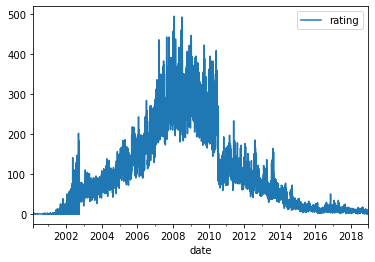

In [25]:
daily_data.plot()